In [1]:
import pandas as pd
import requests
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [2]:
HACKER_NEWS_TOP_STORIES_API = "https://hacker-news.firebaseio.com/v0/topstories.json"
HACKER_NEWS_BEST_STORIES_API = "https://hacker-news.firebaseio.com/v0/beststories.json"
HACKER_NEWS_NEW_STORIES_API = "https://hacker-news.firebaseio.com/v0/newstories.json"
HACKER_NEWS_ITEM_STORIES_API = "https://hacker-news.firebaseio.com/v0/item/"

In [3]:
def hackernews_request(endpoint):
    response = requests.get(endpoint)
    if response.status_code == 200:
        return {"status_code": 200, "json_response": response.json()}
    else:
        return {"status_code": response.status_code, "json_response": None}

In [4]:
# Get Best stories from HackerNews
# Basic code to get all best stories, I am not worried about getting all values at this point of time

best_stories_dict = []
best_stories_response = hackernews_request(HACKER_NEWS_BEST_STORIES_API)
if best_stories_response["status_code"] == 200:
    for item_id in best_stories_response["json_response"]:
        item_url = HACKER_NEWS_ITEM_STORIES_API + str(item_id) + ".json"
        item_response = hackernews_request(item_url)
        if item_response["status_code"] == 200:
            best_stories_dict.append(item_response["json_response"])
        else:
            print("Item -", item_id, "returned -", item_response["status_code"])
else:
    print("Hacker News Best Stories API returned -", best_stories_response["status_code"])

In [5]:
best_stories_df = pd.DataFrame.from_dict(best_stories_dict, orient="columns")

In [12]:
title_list = best_stories_df["title"].to_list()
stop_words_list = stopwords.words('english')
stop_words_list += [',',':','–','?',"'s",'(',')','“','”','[',']','‘','’',"'m","'+","'","n't",'!','%','-','.']

basic_word_list = []

for title in title_list:
    words = word_tokenize(title)
    for word in words:
        word = word.lower()
        if not word in stop_words_list:
            basic_word_list.append(word)

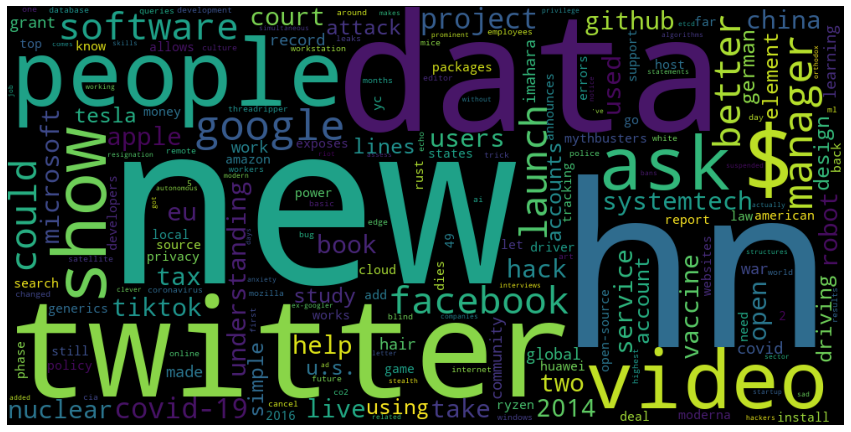

In [14]:
word_could_dict=Counter(basic_word_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# I plan to take only the adjective, noun and the verb from the sentence to form the word cloud